# Extracción y tratamiento de datos en redes sociales con Python.
## A. Molina 2023 - Universidad Politécnica de Valencia (amolina@upv.es)

## Generar una nube de palabras con los términos más frecuentes aparecidos en una búsqueda en Tweeter

In [27]:
 #install once.
!pip install wordcloud
!pip install twitter-text-parser
!pip install emoji --upgrade

In [28]:
from wordcloud import WordCloud
import numpy as np
import nltk
import re
import matplotlib.pyplot as plt
from PIL import Image
from nltk import TweetTokenizer
import twitter_text as twt
import emoji

# 1. Cargar los tweets

In [29]:
#escribe aquí tu código. Carga los tweets del archivo tweets.txt
f = open("./tweets.txt",'r',encoding='UTF8')
tweets = f.readlines()
f.close()
print(tweets)

['Si la mayoría de los congresitas elegidos hoy en USA son del partido republicano, la naturaleza, el medio ambiente y la humanidad corren peligro de muerte, porq son unos tóxicos llegaría a la presidencia otra vez Donald Trump, se vendría el Covid-25 y más guerra.#LíbranosSeñor🙏\n', 'llevo una semana sin ver a phoe si no se me termina el covid pronto ACABARÉ YO CON EL COVID 😡😡😡😡😡 esto es homofobia ya\n', 'El legado del Covid,se dejaron de hacer miles de ex preventivos. Viene la oleada de cáncer. https://t.co/emWruigM8M\n', 'El motivo por el que se llama ‘Perro del infierno’ a la nueva variante de la COVID-19 via @diarioas https://t.co/JkHDmViA6a\n', '@peqe1986 Seguro. Al sacarnos los barbijos se desmadró todo. Yo zafo porque tengo las 3 dosis anti covid y la antigripal puestas.\n', 'Alberto Castillo:"Los ciudadanos de la Región hacen un extraordinario aprovechamiento del agua. La Región de Murcia sin el sector primario sería un desierto. Durante la covid-19 hemos sido la despensa de E

# 2. Tokenizar los tweets

In [30]:
def mi_tokenizador(texto):

  #Pon aquí el código de tu tokenizador que has realizado en un ejercicio previo
  urls = twt.extract_urls_with_indices(texto)
  emojis = twt.extract_emojis_with_indices(texto)

  for url in urls:
    texto=texto.replace(url['url'],' ')

  for emoji in emojis:
    texto=texto.replace(emoji['emoji'],' ')

  tknzr = TweetTokenizer(preserve_case=False, reduce_len=True, strip_handles=True)
  tokens = tknzr.tokenize(texto)

  return tokens


In [31]:
#Tokeniza los tweets y luego concaténalos en una cadena separados por blancos
texto_tokenizado=[]
for t in tweets:
  texto_tokenizado.extend(mi_tokenizador(t))
print(texto_tokenizado)
todo = ' '.join(texto_tokenizado)


['si', 'la', 'mayoría', 'de', 'los', 'congresitas', 'elegidos', 'hoy', 'en', 'usa', 'son', 'del', 'partido', 'republicano', ',', 'la', 'naturaleza', ',', 'el', 'medio', 'ambiente', 'y', 'la', 'humanidad', 'corren', 'peligro', 'de', 'muerte', ',', 'porq', 'son', 'unos', 'tóxicos', 'llegaría', 'a', 'la', 'presidencia', 'otra', 'vez', 'donald', 'trump', ',', 'se', 'vendría', 'el', 'covid', '-', '25', 'y', 'más', 'guerra', '.', '#líbranosseñor', 'llevo', 'una', 'semana', 'sin', 'ver', 'a', 'phoe', 'si', 'no', 'se', 'me', 'termina', 'el', 'covid', 'pronto', 'acabaré', 'yo', 'con', 'el', 'covid', 'esto', 'es', 'homofobia', 'ya', 'el', 'legado', 'del', 'covid', ',', 'se', 'dejaron', 'de', 'hacer', 'miles', 'de', 'ex', 'preventivos', '.', 'viene', 'la', 'oleada', 'de', 'cáncer', '.', 'el', 'motivo', 'por', 'el', 'que', 'se', 'llama', '‘', 'perro', 'del', 'infierno', '’', 'a', 'la', 'nueva', 'variante', 'de', 'la', 'covid', '-', '19', 'via', 'seguro', '.', 'al', 'sacarnos', 'los', 'barbijos', '

## 3. Visualizar los términos más frecuentes en una nube de palabras

#### 4.1 Generar una nube de palabras básica:

In [ ]:
wc = WordCloud(background_color='white', max_words=30, collocations=False)              # Customize the output.
wc.generate(todo)                             #Recibe como entrada un string
wc.words_                                                          # Check for the top ranking words.

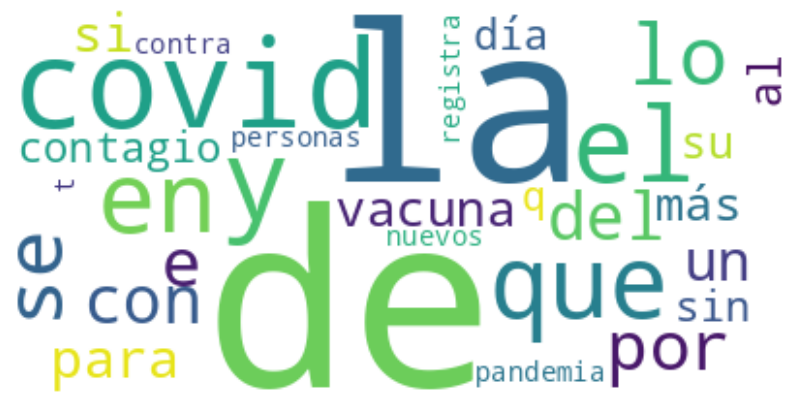

In [48]:
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")                                    # Turn off the axes.
plt.show()

#### 4.2 Generar una nube de palabras utilizando una máscara:

In [35]:
# Pick a background mask.
#img = Image.open('background_1.png')                    # Elipse.
#img = Image.open('background_2.png')                   # Speech bubble.
#img = Image.open('background_3.png')                    # Heart.
img = Image.open('background_4.png')                    # Circle.
back_mask = np.array(img)

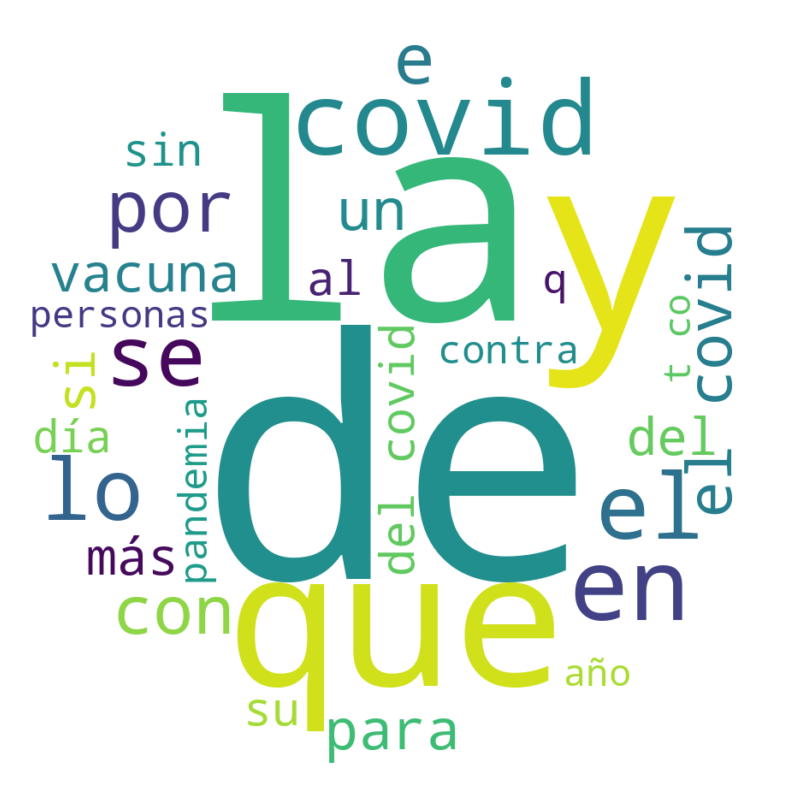

In [36]:
wc = WordCloud(background_color='white', max_words=30, mask=back_mask)            # Customize the output.
wc.generate(todo)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")                                    # Turn off the axes.
plt.show()

## 4. Elimina las stop words y vuelve a generar la nube de palabras

In [49]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [50]:
# Escribe aquí tu código. Tienes que eliminar las stopwords del texto tokenizado y volver a generar la nube de palabras
# Remove the stopwords
mi_stopwords=stopwords.words('spanish')
mi_stopwords.append('covid')
#words = [t for t in texto_tokenizado if t not in stopwords.words('spanish')]
words = [t for t in texto_tokenizado if t not in mi_stopwords]
todo_sin_stopwords = ' '.join(words)
print (todo_sin_stopwords)

si mayoría congresitas elegidos hoy usa partido republicano , naturaleza , medio ambiente humanidad corren peligro muerte , porq tóxicos llegaría presidencia vez donald trump , vendría - 25 guerra . #líbranosseñor llevo semana ver phoe si termina pronto acabaré homofobia legado , dejaron hacer miles ex preventivos . viene oleada cáncer . motivo llama ‘ perro infierno ’ nueva variante - 19 via seguro . sacarnos barbijos desmadró . zafo 3 dosis anti antigripal puestas . alberto castillo : " ciudadanos región hacen extraordinario aprovechamiento agua . región murcia sector primario desierto . - 19 sido despensa europa " revisión prensa hoy diario informa acerca estrategia autotesteo #covid_19 mediante #antígeno llamado prevenir . pandemia terminado virus sarscov - 2 continúa abundante circulación . #seguimoscuidándonos #ciencia / investigación cargo ayudaron desarrollar vacuna - 19 pfizer biontech señora ayuso debería preocupar tema sangrante , si compite gestión . vacunas subunidades pro

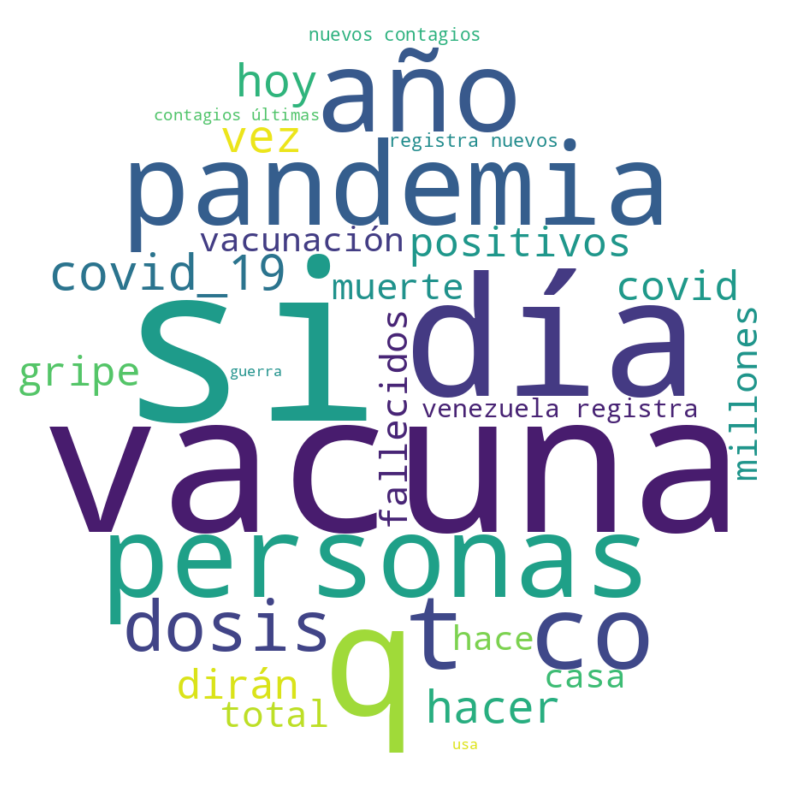

In [51]:
wc = WordCloud(background_color='white', max_words=30, mask=back_mask)            # Customize the output.
wc.generate(todo_sin_stopwords)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")                                    # Turn off the axes.
plt.show()

## Generar la nube de palabras para el libro "book_three_little_pigs.txt", únicamente para las palabras del texto que sean Nombres

In [40]:
# Escribe aquí tu código.
# Utiliza el POS Tagger de NLTK, con el juego de etiquetas universal, y selecciona las palabras etiquetadas con la categoría NOUN.
nltk.download('averaged_perceptron_tagger')
from nltk import pos_tag
nltk.download('punkt')
nltk.download('universal_tagset')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


True

In [41]:
f = open("./book_three_little_pigs.txt",'r',encoding='UTF8')
book = f.read()
f.close()

In [ ]:
tokens = nltk.word_tokenize(book)
my_words_tagged = nltk.pos_tag(tokens,tagset="universal")
my_words_tagged


In [55]:
tokens_nouns = [w for (w,t) in my_words_tagged if t=='NOUN']

In [ ]:

wc = WordCloud(background_color='white', max_words=30, mask=back_mask)            # Customize the output.
wc.generate(' '.join(tokens_nouns))
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")                                    # Turn off the axes.
plt.show()

## Obtener los 10 stems más frecuentes

In [58]:
from nltk import PorterStemmer
from nltk.probability import FreqDist

In [66]:
# Tokenizar el texto
tokens = nltk.word_tokenize(book)
stems=[]

In [67]:
# Obtener los stems

stemmer = PorterStemmer() # Otros stemmers: snowball y lancaster
for t in tokens:
  stems.append(stemmer.stem(t))

In [68]:
# Calcular estadísticas
fdist = FreqDist(stems)
print ("Stem más frecuente: ", fdist.max())

Stem más frecuente:  ,


In [70]:
print("10 stems más frecuentes")
print (fdist.most_common(10))

10 stems más frecuentes
[(',', 115), ('the', 72), ('and', 58), ('.', 42), ('he', 39), ('pig', 38), ("'", 35), ('littl', 25), ('to', 22), ('i', 21)]


In [74]:
print("Total de stems: ", fdist.N())

Total de stems:  1170


In [76]:
print("Vocabulario (stems diferentes) ", len(set(stems)))

Vocabulario (stems diferentes)  241
